# Análisis Titanic

1. Carga de datos
2. Exploración
3. Procesamiento
4. Modelos
5. Evaluación
6. Predicción
7. Conclusión y próximos pasos

## Cargando datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Explorando datos

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.shape

(891, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bateman, Rev. Robert James",male,347082,G6,S
freq,1,577,7,4,644


## 2.1 EDA: Estudio de la variable target

In [11]:
train.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [17]:
# target vs sex
grouped_sex = train.groupby(['Survived', 'Sex']).count()['PassengerId']
grouped_sex.unstack(level = 0)

Survived,0,1
Sex,,
female,81,233
male,468,109


Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


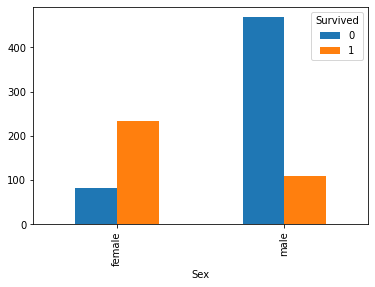

In [16]:
print(grouped_sex)
(grouped_sex.unstack(level = 0).plot.bar())
plt.show()

## 3. Procesamiento de datos

In [18]:
train[['Survived', 'Sex', 'Age', 'Pclass']].head()


,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3
3,1,female,35.0,1
4,0,male,35.0,3


In [19]:
train[['Survived', 'Sex', 'Age', 'Pclass']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [20]:
# como se distribuyen los nulos en edad
(train[train['Age'].isna()]
        .groupby(['Sex', 'Pclass'])
        .count()['PassengerId']
        .unstack(level= 0))

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [21]:
(train[train['Age'].isna()]
        .groupby(['SibSp', 'Parch'])
        .count()['PassengerId']
        .unstack(level= 0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


La mayoría de la gente viajaba sola y eran de 3era clase

Se puede crear una variable que indique si se viajaba solo o acompañado

In [22]:
# calcular la mediana de Age para imputar
train['Age'].median()

28.0

In [23]:
# imputar valor para rellenar nulos
train['Age'] = train['Age'].fillna(28.)
train[['Survived', 'Sex', 'Age', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


Ya no tenemos nulos

In [24]:
# map para label encoding
train['Sex'] = train['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [25]:
train[['Survived', 'Sex', 'Age', 'Pclass']].head()

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3
3,1,1,35.0,1
4,0,0,35.0,3


## 3.1 Crear nuevas variables

In [26]:
# Crear nueva variable tipo flag 'solo'
train['FlagSolo'] = np.where(
    (train['SibSp'] == 0) & (train['Parch'] == 0), 1, 0)

Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64


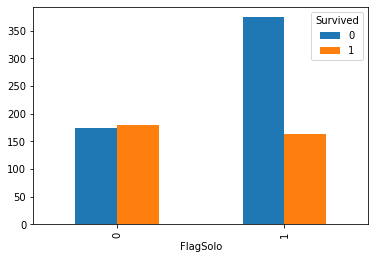

In [28]:
grouped_flag = train.groupby(['Survived', 'FlagSolo']).count()['PassengerId']
print(grouped_flag)
(grouped_flag.unstack(level = 0).plot.bar())
plt.show()

In [29]:
train[['Survived', 'Sex', 'Age', 'Pclass', 'FlagSolo']].head()

,Survived,Sex,Age,Pclass,FlagSolo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1
3,1,1,35.0,1,0
4,0,0,35.0,3,1


In [30]:
Y_train = train['Survived']

features = ['Sex', 'Age', 'Pclass', 'FlagSolo']
X_train = train[features]

print(Y_train.shape, X_train.shape)

(891,) (891, 4)


## 4.Modelos

In [31]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [33]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

## 5. Evaluación

In [34]:
from sklearn.metrics import plot_confusion_matrix

def conf_mat_acc(modelo):
    disp = plot_confusion_matrix(modelo, X_train, Y_train, cmap = plt.cm.Blues, values_format = 'd')
    true_pred = disp.confusion_matrix[0,0] + disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_pred / total_data
    print('accuracy: ', np.round(accuracy, 2))
    plt.show()

accuracy:  0.79


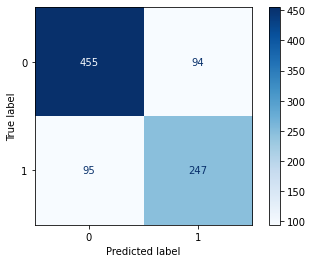

In [35]:
conf_mat_acc(logreg)

accuracy:  0.89


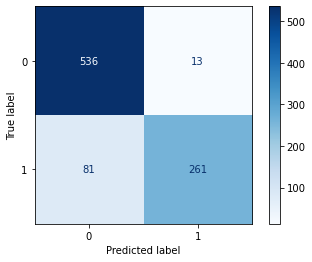

In [36]:
conf_mat_acc(decision_tree)

## 5.1 Evaluación sobre el test set

In [37]:
print(test.head())
test.info()

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ------------

In [38]:
test['Sex'] = test['Sex'].map({'female': 1, 'male': 0})
test['Age'] = test['Age'].fillna(28.)
test['FlagSolo'] = np.where(
            (test['SibSp'] == 0) & (test['Parch'] == 0), 1, 0)

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FlagSolo     418 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 37.7+ KB


In [40]:
test[features].head()

,Sex,Age,Pclass,FlagSolo
0,0,34.5,3,1
1,1,47.0,3,0
2,0,62.0,2,1
3,0,27.0,3,1
4,1,22.0,3,0


In [41]:
X_test = test[features]
X_test.shape

(418, 4)

In [42]:
# Prediccione de Survived en test set
Y_pred_log = logreg.predict(X_test)
Y_pred_tree = decision_tree.predict(X_test)
print(Y_pred_log[0:10])

[0 0 0 0 1 0 1 0 1 0]


## Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 2)


In [104]:
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth' : [2, 3 , 4, 5]
}

In [105]:
grid_search = GridSearchCV(estimator = forest, param_grid = parameters, scoring = 'accuracy', cv = 10)
grid_search = grid_search.fit(X_train, Y_train)
best_paramters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [106]:
print(best_paramters)
print(best_accuracy)

{'max_depth': 5, 'n_estimators': 100}
0.8147940074906368


In [108]:

forest = RandomForestClassifier(n_estimators = 100, max_depth = 5)
forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5)

In [109]:
y_pred_forest = forest.predict(X_test)

## Aplicando ANN

In [70]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [71]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
classifier.add(Dense( units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense( units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [72]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [73]:
classifier.fit(X_train, Y_train,  epochs = 200)

Epoch 1/200
28/28 [==============================] - 1s 1ms/step - loss: 0.6907 - accuracy: 0.6083
Epoch 2/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.6162
Epoch 3/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6712 - accuracy: 0.6162
Epoch 4/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.6162
Epoch 5/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6599 - accuracy: 0.6162
Epoch 6/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.6162
Epoch 7/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.6162
Epoch 8/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6560 - accuracy: 0.6162
Epoch 9/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6544 - accuracy: 0.6162
Epoch 10/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6525 - accuracy: 0.6162
Epoch 11/

28/28 [==============================] - 0s 1ms/step - loss: 0.4667 - accuracy: 0.8081
Epoch 84/200
28/28 [==============================] - 0s 1ms/step - loss: 0.4684 - accuracy: 0.7890
Epoch 85/200
28/28 [==============================] - 0s 1ms/step - loss: 0.4676 - accuracy: 0.7935
Epoch 86/200
28/28 [==============================] - 0s 1ms/step - loss: 0.4642 - accuracy: 0.7912
Epoch 87/200
28/28 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.8002
Epoch 88/200
28/28 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.7912
Epoch 89/200
28/28 [==============================] - 0s 1ms/step - loss: 0.4634 - accuracy: 0.7969
Epoch 90/200
28/28 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.7935
Epoch 91/200
28/28 [==============================] - 0s 1ms/step - loss: 0.4617 - accuracy: 0.8002
Epoch 92/200
28/28 [==============================] - 0s 1ms/step - loss: 0.4633 - accuracy: 0.7924
Epoch 93/200


28/28 [==============================] - 0s 1ms/step - loss: 0.4413 - accuracy: 0.8103
Epoch 165/200
28/28 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.8025
Epoch 166/200
28/28 [==============================] - 0s 1ms/step - loss: 0.4456 - accuracy: 0.8047
Epoch 167/200
28/28 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.8103
Epoch 168/200
28/28 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.8114
Epoch 169/200
28/28 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.8103
Epoch 170/200
28/28 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.8047
Epoch 171/200
28/28 [==============================] - 0s 1ms/step - loss: 0.4446 - accuracy: 0.8047
Epoch 172/200
28/28 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.8081
Epoch 173/200
28/28 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.8126
Epoc

In [93]:
def build_classifier(optimizer = 'adam'):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
    classifier.add(Dense( units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense( units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return classifier


In [94]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

classifier = KerasClassifier(build_fn = build_classifier)

<ipython-input-94-80e4951481d5>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  classifier = KerasClassifier(build_fn = build_classifier)


In [95]:
parameters = {
    'batch_size' : [10, 32],
    'epochs': [200],
    'optimizer': ['adam', 'rmsprop']
}

In [96]:
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10)
grid_search = grid_search.fit(X_train, Y_train)
best_paramters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/200
81/81 [==============================] - 1s 1ms/step - loss: 0.6879 - accuracy: 0.6142
Epoch 2/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6674 - accuracy: 0.6217
Epoch 3/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6556 - accuracy: 0.6217
Epoch 4/200
81/81 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.6217
Epoch 5/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6453 - accuracy: 0.6217
Epoch 6/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6343 - accuracy: 0.6217
Epoch 7/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6191 - accuracy: 0.6217
Epoch 8/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6013 - accuracy: 0.6217
Epoch 9/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5804 - accuracy: 0.6217
Epoch 10/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5647 - accuracy: 0.6217
Epoch 11/

81/81 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.8065
Epoch 84/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.8027
Epoch 85/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4403 - accuracy: 0.8077
Epoch 86/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.8040
Epoch 87/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4428 - accuracy: 0.8015
Epoch 88/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.8102
Epoch 89/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4382 - accuracy: 0.8065
Epoch 90/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.8090
Epoch 91/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.7928
Epoch 92/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.8102
Epoch 93/200


81/81 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.7915
Epoch 165/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8027
Epoch 166/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.8090
Epoch 167/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.8152
Epoch 168/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.8127
Epoch 169/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4297 - accuracy: 0.8077
Epoch 170/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.7928
Epoch 171/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.8052
Epoch 172/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.7953
Epoch 173/200
81/81 [==============================] - 0s 963us/step - loss: 0.4307 - accuracy: 0.8140
Ep

81/81 [==============================] - 0s 1ms/step - loss: 0.4423 - accuracy: 0.7993
Epoch 46/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4453 - accuracy: 0.7943
Epoch 47/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.7918
Epoch 48/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4441 - accuracy: 0.7930
Epoch 49/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.8005
Epoch 50/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4407 - accuracy: 0.7980
Epoch 51/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.7918
Epoch 52/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.8017
Epoch 53/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4388 - accuracy: 0.8030
Epoch 54/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4398 - accuracy: 0.7943
Epoch 55/200


81/81 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.8055
Epoch 127/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8042
Epoch 128/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.7930
Epoch 129/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8005
Epoch 130/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.7943
Epoch 131/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.7968
Epoch 132/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.7968
Epoch 133/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8042
Epoch 134/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4330 - accuracy: 0.7905
Epoch 135/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.7968
Epoc

81/81 [==============================] - 0s 1ms/step - loss: 0.5993 - accuracy: 0.6160
Epoch 8/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.6160
Epoch 9/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5610 - accuracy: 0.6160
Epoch 10/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5472 - accuracy: 0.7431
Epoch 11/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5423 - accuracy: 0.7681
Epoch 12/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5306 - accuracy: 0.7681
Epoch 13/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5287 - accuracy: 0.7768
Epoch 14/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5238 - accuracy: 0.7731
Epoch 15/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.7830
Epoch 16/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5205 - accuracy: 0.7843
Epoch 17/200
81

81/81 [==============================] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.8017
Epoch 90/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.8042
Epoch 91/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4474 - accuracy: 0.8017
Epoch 92/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.7993
Epoch 93/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.7930
Epoch 94/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.8080
Epoch 95/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4472 - accuracy: 0.8067
Epoch 96/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4480 - accuracy: 0.7968
Epoch 97/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4474 - accuracy: 0.8092
Epoch 98/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4475 - accuracy: 0.8005
Epoch 99/200


81/81 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.7993
Epoch 171/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4461 - accuracy: 0.7980
Epoch 172/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.7955
Epoch 173/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.7968
Epoch 174/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4393 - accuracy: 0.8055
Epoch 175/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.8030
Epoch 176/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.7980
Epoch 177/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.8030
Epoch 178/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.8030
Epoch 179/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.8080
Epoc

81/81 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.7943
Epoch 52/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4339 - accuracy: 0.7905
Epoch 53/200
81/81 [==============================] - 0s 984us/step - loss: 0.4363 - accuracy: 0.7930
Epoch 54/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.7830
Epoch 55/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4361 - accuracy: 0.7955
Epoch 56/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4339 - accuracy: 0.7893
Epoch 57/200
81/81 [==============================] - 0s 975us/step - loss: 0.4333 - accuracy: 0.7930
Epoch 58/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.7943
Epoch 59/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.7868
Epoch 60/200
81/81 [==============================] - 0s 950us/step - loss: 0.4357 - accuracy: 0.7880
Epoch 6

81/81 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.7868
Epoch 133/200
81/81 [==============================] - 0s 963us/step - loss: 0.4298 - accuracy: 0.7943
Epoch 134/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.7880
Epoch 135/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.7943
Epoch 136/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.8055
Epoch 137/200
81/81 [==============================] - 0s 988us/step - loss: 0.4320 - accuracy: 0.7743
Epoch 138/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.7830
Epoch 139/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4326 - accuracy: 0.7805
Epoch 140/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.7855
Epoch 141/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.7855


Epoch 13/200
81/81 [==============================] - 0s 950us/step - loss: 0.4698 - accuracy: 0.7993
Epoch 14/200
81/81 [==============================] - 0s 925us/step - loss: 0.4632 - accuracy: 0.7955
Epoch 15/200
81/81 [==============================] - 0s 938us/step - loss: 0.4584 - accuracy: 0.8005
Epoch 16/200
81/81 [==============================] - 0s 988us/step - loss: 0.4623 - accuracy: 0.7968
Epoch 17/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.7968
Epoch 18/200
81/81 [==============================] - 0s 950us/step - loss: 0.4565 - accuracy: 0.7930
Epoch 19/200
81/81 [==============================] - 0s 988us/step - loss: 0.4556 - accuracy: 0.7968
Epoch 20/200
81/81 [==============================] - 0s 938us/step - loss: 0.4526 - accuracy: 0.7980
Epoch 21/200
81/81 [==============================] - 0s 988us/step - loss: 0.4511 - accuracy: 0.7980
Epoch 22/200
81/81 [==============================] - 0s 975us/step - loss: 0.4523 -

81/81 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8030
Epoch 94/200
81/81 [==============================] - 0s 963us/step - loss: 0.4318 - accuracy: 0.8017
Epoch 95/200
81/81 [==============================] - 0s 988us/step - loss: 0.4253 - accuracy: 0.8017
Epoch 96/200
81/81 [==============================] - 0s 938us/step - loss: 0.4299 - accuracy: 0.8080
Epoch 97/200
81/81 [==============================] - 0s 975us/step - loss: 0.4286 - accuracy: 0.8117
Epoch 98/200
81/81 [==============================] - 0s 941us/step - loss: 0.4265 - accuracy: 0.7980
Epoch 99/200
81/81 [==============================] - 0s 963us/step - loss: 0.4316 - accuracy: 0.7968
Epoch 100/200
81/81 [==============================] - 0s 950us/step - loss: 0.4274 - accuracy: 0.8067
Epoch 101/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.8105
Epoch 102/200
81/81 [==============================] - 0s 988us/step - loss: 0.4291 - accuracy: 0

81/81 [==============================] - 0s 933us/step - loss: 0.4295 - accuracy: 0.8092
Epoch 174/200
81/81 [==============================] - 0s 988us/step - loss: 0.4274 - accuracy: 0.8092
Epoch 175/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4290 - accuracy: 0.8055
Epoch 176/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8105
Epoch 177/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.8067
Epoch 178/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4276 - accuracy: 0.8042
Epoch 179/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8167
Epoch 180/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.8042
Epoch 181/200
81/81 [==============================] - 0s 988us/step - loss: 0.4267 - accuracy: 0.8092
Epoch 182/200
81/81 [==============================] - 0s 938us/step - loss: 0.4291 - accuracy: 0.8

81/81 [==============================] - 0s 1ms/step - loss: 0.4398 - accuracy: 0.8067
Epoch 47/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.8117
Epoch 48/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.8067
Epoch 49/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4408 - accuracy: 0.8067
Epoch 50/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.8117
Epoch 51/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.7993
Epoch 52/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.7980
Epoch 53/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4405 - accuracy: 0.7955
Epoch 54/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.8130
Epoch 55/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.8105
Epoch 56/200


81/81 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.8117
Epoch 128/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.8155
Epoch 129/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4296 - accuracy: 0.8092
Epoch 130/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.8130
Epoch 131/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4312 - accuracy: 0.8017
Epoch 132/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.8092
Epoch 133/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4290 - accuracy: 0.8180
Epoch 134/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8042
Epoch 135/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.8005
Epoch 136/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.8142
Epoc

Epoch 1/200
81/81 [==============================] - 1s 1ms/step - loss: 0.6847 - accuracy: 0.6222
Epoch 2/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6619 - accuracy: 0.6222
Epoch 3/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6552 - accuracy: 0.6222
Epoch 4/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6527 - accuracy: 0.6222
Epoch 5/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6505 - accuracy: 0.6222
Epoch 6/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6476 - accuracy: 0.6222
Epoch 7/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6416 - accuracy: 0.6222
Epoch 8/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6330 - accuracy: 0.6222
Epoch 9/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6220 - accuracy: 0.6222
Epoch 10/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6056 - accuracy: 0.6222
Epoch 11/

81/81 [==============================] - 0s 1ms/step - loss: 0.4477 - accuracy: 0.8155
Epoch 84/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4506 - accuracy: 0.8092
Epoch 85/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.8092
Epoch 86/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.8130
Epoch 87/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4458 - accuracy: 0.8167
Epoch 88/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.8092
Epoch 89/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4488 - accuracy: 0.8142
Epoch 90/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4464 - accuracy: 0.8055
Epoch 91/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4484 - accuracy: 0.8155
Epoch 92/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4477 - accuracy: 0.8142
Epoch 93/200


81/81 [==============================] - 0s 1ms/step - loss: 0.4398 - accuracy: 0.8130
Epoch 165/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.8067
Epoch 166/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4369 - accuracy: 0.8105
Epoch 167/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4383 - accuracy: 0.8055
Epoch 168/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4376 - accuracy: 0.8180
Epoch 169/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.8142
Epoch 170/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4382 - accuracy: 0.8117
Epoch 171/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8055
Epoch 172/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8167
Epoch 173/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4363 - accuracy: 0.8042
Epoc

81/81 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.8080
Epoch 46/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4660 - accuracy: 0.8067
Epoch 47/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4614 - accuracy: 0.8117
Epoch 48/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.8080
Epoch 49/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4622 - accuracy: 0.8092
Epoch 50/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4648 - accuracy: 0.8017
Epoch 51/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4593 - accuracy: 0.8080
Epoch 52/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4596 - accuracy: 0.8080
Epoch 53/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4593 - accuracy: 0.8117
Epoch 54/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.8005
Epoch 55/200


81/81 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.8167
Epoch 127/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.8117
Epoch 128/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4418 - accuracy: 0.8142
Epoch 129/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.8142
Epoch 130/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4419 - accuracy: 0.8180
Epoch 131/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4418 - accuracy: 0.8092
Epoch 132/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.8142
Epoch 133/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.8092
Epoch 134/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.8155
Epoch 135/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.8155
Epoc

81/81 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.6110
Epoch 8/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6528 - accuracy: 0.6110
Epoch 9/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6491 - accuracy: 0.6110
Epoch 10/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6446 - accuracy: 0.6110
Epoch 11/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6389 - accuracy: 0.6110
Epoch 12/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6307 - accuracy: 0.6110
Epoch 13/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6202 - accuracy: 0.6110
Epoch 14/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6066 - accuracy: 0.6160
Epoch 15/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5914 - accuracy: 0.6496
Epoch 16/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5785 - accuracy: 0.6933
Epoch 17/200
81

81/81 [==============================] - 0s 1ms/step - loss: 0.4715 - accuracy: 0.7905
Epoch 90/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.7930
Epoch 91/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4703 - accuracy: 0.7905
Epoch 92/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.7880
Epoch 93/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4698 - accuracy: 0.7905
Epoch 94/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4704 - accuracy: 0.7793
Epoch 95/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.7830
Epoch 96/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4714 - accuracy: 0.7781
Epoch 97/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4704 - accuracy: 0.7918
Epoch 98/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4705 - accuracy: 0.7818
Epoch 99/200


81/81 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.7955
Epoch 171/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4672 - accuracy: 0.7793
Epoch 172/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4657 - accuracy: 0.7793
Epoch 173/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.7830
Epoch 174/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4649 - accuracy: 0.7830
Epoch 175/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4669 - accuracy: 0.7731
Epoch 176/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4668 - accuracy: 0.7918
Epoch 177/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.7830
Epoch 178/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4664 - accuracy: 0.7756
Epoch 179/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4655 - accuracy: 0.7756
Epoc

81/81 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.8005
Epoch 52/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.8017
Epoch 53/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4377 - accuracy: 0.8017
Epoch 54/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4377 - accuracy: 0.8042
Epoch 55/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4440 - accuracy: 0.8030
Epoch 56/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.8080
Epoch 57/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4367 - accuracy: 0.7980
Epoch 58/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.8067
Epoch 59/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.7980
Epoch 60/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.8080
Epoch 61/200


81/81 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.8142
Epoch 133/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.8017
Epoch 134/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8167
Epoch 135/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.8067
Epoch 136/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.7968
Epoch 137/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8130
Epoch 138/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8080
Epoch 139/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.8142
Epoch 140/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.8067
Epoch 141/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4437 - accuracy: 0.7868
Epoc

81/81 [==============================] - 0s 1ms/step - loss: 0.6213 - accuracy: 0.6217
Epoch 14/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6083 - accuracy: 0.6217
Epoch 15/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5947 - accuracy: 0.6404
Epoch 16/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.6679
Epoch 17/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5619 - accuracy: 0.6966
Epoch 18/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5487 - accuracy: 0.7453
Epoch 19/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5424 - accuracy: 0.7491
Epoch 20/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5361 - accuracy: 0.7640
Epoch 21/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5305 - accuracy: 0.7653
Epoch 22/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5255 - accuracy: 0.7678
Epoch 23/200


81/81 [==============================] - 0s 1ms/step - loss: 0.4565 - accuracy: 0.7928
Epoch 96/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.7890
Epoch 97/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4558 - accuracy: 0.7915
Epoch 98/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.7928
Epoch 99/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4563 - accuracy: 0.7978
Epoch 100/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4565 - accuracy: 0.7903
Epoch 101/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4538 - accuracy: 0.7928
Epoch 102/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.7853
Epoch 103/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.7878
Epoch 104/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.7815
Epoch 10

81/81 [==============================] - 0s 1ms/step - loss: 0.4542 - accuracy: 0.7915
Epoch 177/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4535 - accuracy: 0.7878
Epoch 178/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.7928
Epoch 179/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.8002
Epoch 180/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4536 - accuracy: 0.7878
Epoch 181/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.7853
Epoch 182/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4526 - accuracy: 0.7915
Epoch 183/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy: 0.7865
Epoch 184/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.7840
Epoch 185/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4536 - accuracy: 0.7953
Epoc

81/81 [==============================] - 0s 1ms/step - loss: 0.4444 - accuracy: 0.7943
Epoch 58/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.7843
Epoch 59/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.7993
Epoch 60/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.7930
Epoch 61/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.7843
Epoch 62/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.7793
Epoch 63/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4437 - accuracy: 0.8042
Epoch 64/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4456 - accuracy: 0.7868
Epoch 65/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4435 - accuracy: 0.7943
Epoch 66/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4444 - accuracy: 0.7918
Epoch 67/200


81/81 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.7893
Epoch 139/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.8055
Epoch 140/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.7980
Epoch 141/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4348 - accuracy: 0.8067
Epoch 142/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.8017
Epoch 143/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8067
Epoch 144/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.7980
Epoch 145/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.8055
Epoch 146/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.8055
Epoch 147/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8017
Epoc

81/81 [==============================] - 0s 1ms/step - loss: 0.5349 - accuracy: 0.7594
Epoch 20/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.7781
Epoch 21/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5126 - accuracy: 0.7681
Epoch 22/200
81/81 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.7793
Epoch 23/200
81/81 [==============================] - 0s 975us/step - loss: 0.4965 - accuracy: 0.7768
Epoch 24/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.7843
Epoch 25/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4841 - accuracy: 0.7805
Epoch 26/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.7830
Epoch 27/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4759 - accuracy: 0.7830
Epoch 28/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.7818
Epoch 29/20

81/81 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.8030
Epoch 102/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4342 - accuracy: 0.7930
Epoch 103/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.7993
Epoch 104/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.8005
Epoch 105/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.7993
Epoch 106/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.8005
Epoch 107/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.7968
Epoch 108/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.7980
Epoch 109/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.7993
Epoch 110/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.8005
Epoc

81/81 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.7980
Epoch 183/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8005
Epoch 184/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.8030
Epoch 185/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4320 - accuracy: 0.8055
Epoch 186/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.7955
Epoch 187/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.8067
Epoch 188/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.7943
Epoch 189/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8042
Epoch 190/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.7993
Epoch 191/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.8005
Epoc

Epoch 64/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4494 - accuracy: 0.7843
Epoch 65/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4471 - accuracy: 0.7830
Epoch 66/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4451 - accuracy: 0.7830
Epoch 67/200
81/81 [==============================] - 0s 975us/step - loss: 0.4476 - accuracy: 0.7880
Epoch 68/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.7843
Epoch 69/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.7868
Epoch 70/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4480 - accuracy: 0.7756
Epoch 71/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.7781
Epoch 72/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.7805
Epoch 73/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4456 - accuracy: 0.796

81/81 [==============================] - 0s 1ms/step - loss: 0.4440 - accuracy: 0.7768
Epoch 146/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4441 - accuracy: 0.7818
Epoch 147/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4444 - accuracy: 0.7880
Epoch 148/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4426 - accuracy: 0.7818
Epoch 149/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.7843
Epoch 150/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.7843
Epoch 151/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4429 - accuracy: 0.7781
Epoch 152/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4446 - accuracy: 0.7855
Epoch 153/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4428 - accuracy: 0.7793
Epoch 154/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.7805
Epoc

81/81 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.7855
Epoch 27/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4573 - accuracy: 0.7893
Epoch 28/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4549 - accuracy: 0.7905
Epoch 29/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4549 - accuracy: 0.7918
Epoch 30/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.7955
Epoch 31/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.7918
Epoch 32/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4524 - accuracy: 0.7955
Epoch 33/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.7930
Epoch 34/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.7930
Epoch 35/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4493 - accuracy: 0.7893
Epoch 36/200


Epoch 108/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8030
Epoch 109/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.7943
Epoch 110/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8092
Epoch 111/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.8130
Epoch 112/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.8067
Epoch 113/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4356 - accuracy: 0.8042
Epoch 114/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8117
Epoch 115/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8055
Epoch 116/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.7968
Epoch 117/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4344 - accurac

81/81 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.7855
Epoch 190/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8030
Epoch 191/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4348 - accuracy: 0.7993
Epoch 192/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4312 - accuracy: 0.8067
Epoch 193/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8080
Epoch 194/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.8067
Epoch 195/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8117
Epoch 196/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4348 - accuracy: 0.8017
Epoch 197/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.7968
Epoch 198/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4296 - accuracy: 0.7980
Epoc

81/81 [==============================] - 0s 1ms/step - loss: 0.4596 - accuracy: 0.8017
Epoch 72/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4609 - accuracy: 0.8067
Epoch 73/200
81/81 [==============================] - 0s 988us/step - loss: 0.4604 - accuracy: 0.8017
Epoch 74/200
81/81 [==============================] - 0s 988us/step - loss: 0.4590 - accuracy: 0.8105
Epoch 75/200
81/81 [==============================] - 0s 988us/step - loss: 0.4596 - accuracy: 0.8042
Epoch 76/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4594 - accuracy: 0.8067
Epoch 77/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4574 - accuracy: 0.8030
Epoch 78/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4583 - accuracy: 0.8130
Epoch 79/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4567 - accuracy: 0.8105
Epoch 80/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4571 - accuracy: 0.8030
Epoch 8

81/81 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.8105
Epoch 153/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.8055
Epoch 154/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4428 - accuracy: 0.8067
Epoch 155/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.8105
Epoch 156/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.8055
Epoch 157/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.8142
Epoch 158/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.8055
Epoch 159/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.8017
Epoch 160/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.8080
Epoch 161/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.8180
Epoc

81/81 [==============================] - 0s 1ms/step - loss: 0.4721 - accuracy: 0.7918
Epoch 34/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4738 - accuracy: 0.7905
Epoch 35/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4707 - accuracy: 0.7918
Epoch 36/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4688 - accuracy: 0.7905
Epoch 37/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.7943
Epoch 38/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4662 - accuracy: 0.7930
Epoch 39/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.7930
Epoch 40/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4637 - accuracy: 0.7893
Epoch 41/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4623 - accuracy: 0.7955
Epoch 42/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4630 - accuracy: 0.7918
Epoch 43/200


81/81 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.7918
Epoch 115/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.8017
Epoch 116/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.7918
Epoch 117/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4437 - accuracy: 0.8005
Epoch 118/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.7955
Epoch 119/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.7905
Epoch 120/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4463 - accuracy: 0.8042
Epoch 121/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4499 - accuracy: 0.7893
Epoch 122/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4451 - accuracy: 0.7905
Epoch 123/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4474 - accuracy: 0.7918
Epoc

81/81 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8030
Epoch 196/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.7930
Epoch 197/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.7905
Epoch 198/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.8067
Epoch 199/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.7955
Epoch 200/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.7880
Epoch 1/200
81/81 [==============================] - 1s 1ms/step - loss: 0.6882 - accuracy: 0.6147
Epoch 2/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.6147
Epoch 3/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.6147
Epoch 4/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6613 - accuracy: 0.6147
Epoch 5/200


81/81 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.8042
Epoch 78/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.8092
Epoch 79/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.8142
Epoch 80/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8130
Epoch 81/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8204
Epoch 82/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8105
Epoch 83/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.8155
Epoch 84/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.8180
Epoch 85/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8067
Epoch 86/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8117
Epoch 87/200


81/81 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8105
Epoch 159/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8192
Epoch 160/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.8117
Epoch 161/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.8092
Epoch 162/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.8155
Epoch 163/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.8217
Epoch 164/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8304
Epoch 165/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.8080
Epoch 166/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.8067
Epoch 167/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.8117
Epoc

81/81 [==============================] - 0s 1ms/step - loss: 0.4515 - accuracy: 0.7781
Epoch 40/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4494 - accuracy: 0.7855
Epoch 41/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4493 - accuracy: 0.7830
Epoch 42/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4461 - accuracy: 0.7905
Epoch 43/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.7893
Epoch 44/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.7805
Epoch 45/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.7855
Epoch 46/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4510 - accuracy: 0.7880
Epoch 47/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.7943
Epoch 48/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.7880
Epoch 49/200


81/81 [==============================] - 0s 1ms/step - loss: 0.4434 - accuracy: 0.7930
Epoch 121/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.7943
Epoch 122/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4455 - accuracy: 0.7855
Epoch 123/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.7893
Epoch 124/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4424 - accuracy: 0.7843
Epoch 125/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.7830
Epoch 126/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4454 - accuracy: 0.7943
Epoch 127/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.7930
Epoch 128/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4453 - accuracy: 0.7868
Epoch 129/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.7955
Epoc

81/81 [==============================] - 1s 1ms/step - loss: 0.6856 - accuracy: 0.6147
Epoch 2/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6702 - accuracy: 0.6147
Epoch 3/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.6147
Epoch 4/200
81/81 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.6147
Epoch 5/200
81/81 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.6147
Epoch 6/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6569 - accuracy: 0.6147
Epoch 7/200
81/81 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.6147
Epoch 8/200
81/81 [==============================] - 0s 1ms/step - loss: 0.6531 - accuracy: 0.6147
Epoch 9/200
81/81 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.6147
Epoch 10/200
81/81 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.6147
Epoch 11/200
81/81 [=

81/81 [==============================] - 0s 1ms/step - loss: 0.4628 - accuracy: 0.7955
Epoch 84/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4638 - accuracy: 0.7968
Epoch 85/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7918
Epoch 86/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.8005
Epoch 87/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.8017
Epoch 88/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.7918
Epoch 89/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4613 - accuracy: 0.7918
Epoch 90/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4622 - accuracy: 0.7930
Epoch 91/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4605 - accuracy: 0.8005
Epoch 92/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.7880
Epoch 93/200


81/81 [==============================] - 0s 1ms/step - loss: 0.4571 - accuracy: 0.7880
Epoch 165/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4575 - accuracy: 0.7880
Epoch 166/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4558 - accuracy: 0.7880
Epoch 167/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7843
Epoch 168/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4568 - accuracy: 0.7830
Epoch 169/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.7880
Epoch 170/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4566 - accuracy: 0.7855
Epoch 171/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4561 - accuracy: 0.7905
Epoch 172/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7868
Epoch 173/200
81/81 [==============================] - 0s 1ms/step - loss: 0.4580 - accuracy: 0.7893
Epoc

26/26 [==============================] - 0s 1ms/step - loss: 0.4535 - accuracy: 0.7865
Epoch 46/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.7853
Epoch 47/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.7890
Epoch 48/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4501 - accuracy: 0.7903
Epoch 49/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.7965
Epoch 50/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.7865
Epoch 51/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4454 - accuracy: 0.7890
Epoch 52/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4471 - accuracy: 0.7903
Epoch 53/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4442 - accuracy: 0.7928
Epoch 54/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.7928
Epoch 55/200


26/26 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8090
Epoch 127/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8090
Epoch 128/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.8027
Epoch 129/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.8077
Epoch 130/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.8077
Epoch 131/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.8115
Epoch 132/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4297 - accuracy: 0.8077
Epoch 133/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4283 - accuracy: 0.8102
Epoch 134/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8002
Epoch 135/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.8102
Epoc

26/26 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.5985
Epoch 8/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6652 - accuracy: 0.5985
Epoch 9/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5985
Epoch 10/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6599 - accuracy: 0.5985
Epoch 11/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6566 - accuracy: 0.5985
Epoch 12/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6504 - accuracy: 0.5985
Epoch 13/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6408 - accuracy: 0.5985
Epoch 14/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6300 - accuracy: 0.5985
Epoch 15/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6162 - accuracy: 0.5985
Epoch 16/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.5985
Epoch 17/200
26

26/26 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.8030
Epoch 90/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4699 - accuracy: 0.8042
Epoch 91/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4695 - accuracy: 0.7993
Epoch 92/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4679 - accuracy: 0.7993
Epoch 93/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4684 - accuracy: 0.8055
Epoch 94/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4688 - accuracy: 0.8017
Epoch 95/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4687 - accuracy: 0.8080
Epoch 96/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4700 - accuracy: 0.8030
Epoch 97/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4677 - accuracy: 0.7993
Epoch 98/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4699 - accuracy: 0.8030
Epoch 99/200


26/26 [==============================] - 0s 1ms/step - loss: 0.4516 - accuracy: 0.7980
Epoch 171/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.8092
Epoch 172/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4510 - accuracy: 0.7868
Epoch 173/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4506 - accuracy: 0.8030
Epoch 174/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.7993
Epoch 175/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4490 - accuracy: 0.8117
Epoch 176/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.7980
Epoch 177/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4499 - accuracy: 0.7955
Epoch 178/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4530 - accuracy: 0.8067
Epoch 179/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4503 - accuracy: 0.8042
Epoc

26/26 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.7930
Epoch 52/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5055 - accuracy: 0.7955
Epoch 53/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7968
Epoch 54/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.7980
Epoch 55/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.8030
Epoch 56/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5040 - accuracy: 0.7943
Epoch 57/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.7880
Epoch 58/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5011 - accuracy: 0.7943
Epoch 59/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5002 - accuracy: 0.7955
Epoch 60/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4991 - accuracy: 0.7968
Epoch 61/200


26/26 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.8030
Epoch 133/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.7930
Epoch 134/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4507 - accuracy: 0.8005
Epoch 135/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.7955
Epoch 136/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.8030
Epoch 137/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.7693
Epoch 138/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4514 - accuracy: 0.7993
Epoch 139/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4509 - accuracy: 0.7980
Epoch 140/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4514 - accuracy: 0.7993
Epoch 141/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4510 - accuracy: 0.7868
Epoc

26/26 [==============================] - 0s 1ms/step - loss: 0.6421 - accuracy: 0.6297
Epoch 14/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6402 - accuracy: 0.6297
Epoch 15/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6380 - accuracy: 0.6297
Epoch 16/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6352 - accuracy: 0.6297
Epoch 17/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6318 - accuracy: 0.6297
Epoch 18/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6286 - accuracy: 0.6297
Epoch 19/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6240 - accuracy: 0.6297
Epoch 20/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6196 - accuracy: 0.6297
Epoch 21/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6148 - accuracy: 0.6297
Epoch 22/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6092 - accuracy: 0.6297
Epoch 23/200


26/26 [==============================] - 0s 1ms/step - loss: 0.4491 - accuracy: 0.7880
Epoch 96/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4487 - accuracy: 0.7980
Epoch 97/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.7880
Epoch 98/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.7930
Epoch 99/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4470 - accuracy: 0.7880
Epoch 100/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4466 - accuracy: 0.7868
Epoch 101/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4499 - accuracy: 0.7880
Epoch 102/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.7880
Epoch 103/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.7968
Epoch 104/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4463 - accuracy: 0.7918
Epoch 10

26/26 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.8005
Epoch 177/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.7993
Epoch 178/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4418 - accuracy: 0.8005
Epoch 179/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.8030
Epoch 180/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4428 - accuracy: 0.7980
Epoch 181/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.7955
Epoch 182/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.8042
Epoch 183/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4426 - accuracy: 0.7943
Epoch 184/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.8017
Epoch 185/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4418 - accuracy: 0.7955
Epoc

26/26 [==============================] - 0s 1ms/step - loss: 0.4957 - accuracy: 0.7943
Epoch 58/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4966 - accuracy: 0.7930
Epoch 59/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4929 - accuracy: 0.7918
Epoch 60/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4938 - accuracy: 0.7918
Epoch 61/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4912 - accuracy: 0.7843
Epoch 62/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4923 - accuracy: 0.7905
Epoch 63/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4926 - accuracy: 0.7943
Epoch 64/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4888 - accuracy: 0.7930
Epoch 65/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4877 - accuracy: 0.7930
Epoch 66/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4863 - accuracy: 0.7918
Epoch 67/200


26/26 [==============================] - 0s 960us/step - loss: 0.4538 - accuracy: 0.8080
Epoch 139/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.8105
Epoch 140/200
26/26 [==============================] - 0s 960us/step - loss: 0.4501 - accuracy: 0.8142
Epoch 141/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.8155
Epoch 142/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.8117
Epoch 143/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.8080
Epoch 144/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.8042
Epoch 145/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.8055
Epoch 146/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.8155
Epoch 147/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.8030


26/26 [==============================] - 0s 1ms/step - loss: 0.5726 - accuracy: 0.7207
Epoch 20/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5519 - accuracy: 0.7307
Epoch 21/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7743
Epoch 22/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5081 - accuracy: 0.7631
Epoch 23/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4940 - accuracy: 0.7805
Epoch 24/200
26/26 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7793
Epoch 25/200
26/26 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7743
Epoch 26/200
26/26 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7805
Epoch 27/200
26/26 [==============================] - 0s 2ms/step - loss: 0.4699 - accuracy: 0.7818
Epoch 28/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 0.7855
Epoch 29/200


26/26 [==============================] - 0s 1ms/step - loss: 0.4367 - accuracy: 0.8105
Epoch 102/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.7880
Epoch 103/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4361 - accuracy: 0.8030
Epoch 104/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4451 - accuracy: 0.7955
Epoch 105/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.8030
Epoch 106/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.8067
Epoch 107/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.8067
Epoch 108/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.8055
Epoch 109/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.8030
Epoch 110/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4355 - accuracy: 0.8192
Epoc

26/26 [==============================] - 0s 1ms/step - loss: 0.4524 - accuracy: 0.7830
Epoch 183/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.8042
Epoch 184/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.8117
Epoch 185/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8005
Epoch 186/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8067
Epoch 187/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.8030
Epoch 188/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.8067
Epoch 189/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.8105
Epoch 190/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8017
Epoch 191/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4330 - accuracy: 0.8080
Epoc

Epoch 64/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4955 - accuracy: 0.7918
Epoch 65/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4949 - accuracy: 0.7993
Epoch 66/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4943 - accuracy: 0.7930
Epoch 67/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.7980
Epoch 68/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4925 - accuracy: 0.8005
Epoch 69/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4941 - accuracy: 0.7955
Epoch 70/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4905 - accuracy: 0.8017
Epoch 71/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4899 - accuracy: 0.8042
Epoch 72/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4898 - accuracy: 0.7993
Epoch 73/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.8067


26/26 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.7968
Epoch 146/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.8017
Epoch 147/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4649 - accuracy: 0.8005
Epoch 148/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.8030
Epoch 149/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.8030
Epoch 150/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4638 - accuracy: 0.8017
Epoch 151/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4635 - accuracy: 0.8030
Epoch 152/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.8005
Epoch 153/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4649 - accuracy: 0.8017
Epoch 154/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.8005
Epoc

26/26 [==============================] - 0s 1ms/step - loss: 0.4933 - accuracy: 0.7793
Epoch 27/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4804 - accuracy: 0.7805
Epoch 28/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4734 - accuracy: 0.7893
Epoch 29/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4654 - accuracy: 0.7880
Epoch 30/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.7918
Epoch 31/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 0.7843
Epoch 32/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.7756
Epoch 33/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4533 - accuracy: 0.7868
Epoch 34/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.7868
Epoch 35/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4437 - accuracy: 0.7943
Epoch 36/200


26/26 [==============================] - 0s 1ms/step - loss: 0.4269 - accuracy: 0.7980
Epoch 108/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8030
Epoch 109/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4276 - accuracy: 0.8030
Epoch 110/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8042
Epoch 111/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.8030
Epoch 112/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.8017
Epoch 113/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8005
Epoch 114/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4270 - accuracy: 0.8005
Epoch 115/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8005
Epoch 116/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4274 - accuracy: 0.7943
Epoc

26/26 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8005
Epoch 189/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.8017
Epoch 190/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8067
Epoch 191/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8105
Epoch 192/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.8080
Epoch 193/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.7980
Epoch 194/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4361 - accuracy: 0.7868
Epoch 195/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.8030
Epoch 196/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.7980
Epoch 197/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.7955
Epoc

26/26 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.6110
Epoch 71/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.6110
Epoch 72/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6684 - accuracy: 0.6110
Epoch 73/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6684 - accuracy: 0.6110
Epoch 74/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6684 - accuracy: 0.6110
Epoch 75/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6684 - accuracy: 0.6110
Epoch 76/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.6110
Epoch 77/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.6110
Epoch 78/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.6110
Epoch 79/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6684 - accuracy: 0.6110
Epoch 80/200


26/26 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.6110
Epoch 152/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6684 - accuracy: 0.6110
Epoch 153/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6684 - accuracy: 0.6110
Epoch 154/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.6110
Epoch 155/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.6110
Epoch 156/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.6110
Epoch 157/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.6110
Epoch 158/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.6110
Epoch 159/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.6110
Epoch 160/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.6110
Epoc

26/26 [==============================] - 0s 2ms/step - loss: 0.5580 - accuracy: 0.7481
Epoch 33/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5527 - accuracy: 0.7269
Epoch 34/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.7431
Epoch 35/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.7506
Epoch 36/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.7643
Epoch 37/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.7618
Epoch 38/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7731
Epoch 39/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.7544
Epoch 40/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.7643
Epoch 41/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.7793
Epoch 42/200


26/26 [==============================] - 0s 1ms/step - loss: 0.4676 - accuracy: 0.8067
Epoch 114/200
26/26 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.7993
Epoch 115/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4677 - accuracy: 0.8005
Epoch 116/200
26/26 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.8030
Epoch 117/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4678 - accuracy: 0.7993
Epoch 118/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.8005
Epoch 119/200
26/26 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.8017
Epoch 120/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.7993
Epoch 121/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.8005
Epoch 122/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4649 - accuracy: 0.8005
Epoc

26/26 [==============================] - 0s 1ms/step - loss: 0.4514 - accuracy: 0.8017
Epoch 195/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4514 - accuracy: 0.8030
Epoch 196/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4509 - accuracy: 0.8005
Epoch 197/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.8055
Epoch 198/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4536 - accuracy: 0.7905
Epoch 199/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4535 - accuracy: 0.8117
Epoch 200/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4514 - accuracy: 0.8030
Epoch 1/200
26/26 [==============================] - 1s 1ms/step - loss: 0.6873 - accuracy: 0.6217
Epoch 2/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.6217
Epoch 3/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6674 - accuracy: 0.6217
Epoch 4/20

26/26 [==============================] - 0s 1ms/step - loss: 0.4580 - accuracy: 0.7965
Epoch 77/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4551 - accuracy: 0.7953
Epoch 78/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4546 - accuracy: 0.7940
Epoch 79/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4558 - accuracy: 0.7903
Epoch 80/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.7890
Epoch 81/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4527 - accuracy: 0.7978
Epoch 82/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4509 - accuracy: 0.7940
Epoch 83/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4509 - accuracy: 0.8002
Epoch 84/200
26/26 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.7953
Epoch 85/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.7915
Epoch 86/200


26/26 [==============================] - 0s 1ms/step - loss: 0.4391 - accuracy: 0.7878
Epoch 158/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.7828
Epoch 159/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.7865
Epoch 160/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.7815
Epoch 161/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.7928
Epoch 162/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4388 - accuracy: 0.7803
Epoch 163/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.7828
Epoch 164/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4397 - accuracy: 0.7890
Epoch 165/200
26/26 [==============================] - 0s 2ms/step - loss: 0.4423 - accuracy: 0.7828
Epoch 166/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4419 - accuracy: 0.7828
Epoc

26/26 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.7506
Epoch 39/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5489 - accuracy: 0.7556
Epoch 40/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5409 - accuracy: 0.7544
Epoch 41/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5337 - accuracy: 0.7656
Epoch 42/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5271 - accuracy: 0.7594
Epoch 43/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5207 - accuracy: 0.7519
Epoch 44/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5148 - accuracy: 0.7643
Epoch 45/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5087 - accuracy: 0.7681
Epoch 46/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.7656
Epoch 47/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4994 - accuracy: 0.7643
Epoch 48/200


26/26 [==============================] - 0s 1ms/step - loss: 0.4360 - accuracy: 0.7930
Epoch 120/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.7880
Epoch 121/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.7793
Epoch 122/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4383 - accuracy: 0.7843
Epoch 123/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.7918
Epoch 124/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4391 - accuracy: 0.7830
Epoch 125/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4360 - accuracy: 0.7893
Epoch 126/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.8030
Epoch 127/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.7781
Epoch 128/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.7905
Epoc

26/26 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.7980
Epoch 200/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.8017
Epoch 1/200
26/26 [==============================] - 1s 1ms/step - loss: 0.6888 - accuracy: 0.6160
Epoch 2/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.6160
Epoch 3/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6748 - accuracy: 0.6160
Epoch 4/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.6160
Epoch 5/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6632 - accuracy: 0.6160
Epoch 6/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6611 - accuracy: 0.6160
Epoch 7/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6605 - accuracy: 0.6160
Epoch 8/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.6160
Epoch 9/200
26/26 [=

26/26 [==============================] - 0s 1ms/step - loss: 0.4790 - accuracy: 0.7893
Epoch 82/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4778 - accuracy: 0.7980
Epoch 83/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.7980
Epoch 84/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.8005
Epoch 85/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.7980
Epoch 86/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.8030
Epoch 87/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.7968
Epoch 88/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4758 - accuracy: 0.7955
Epoch 89/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4704 - accuracy: 0.7980
Epoch 90/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4758 - accuracy: 0.7955
Epoch 91/200


26/26 [==============================] - 0s 1ms/step - loss: 0.4535 - accuracy: 0.8017
Epoch 163/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4529 - accuracy: 0.8105
Epoch 164/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.8130
Epoch 165/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4524 - accuracy: 0.8142
Epoch 166/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy: 0.8080
Epoch 167/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4531 - accuracy: 0.8080
Epoch 168/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.8092
Epoch 169/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.7980
Epoch 170/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4536 - accuracy: 0.8042
Epoch 171/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4537 - accuracy: 0.8067
Epoc

26/26 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.7805
Epoch 44/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5008 - accuracy: 0.7631
Epoch 45/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4960 - accuracy: 0.7693
Epoch 46/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4927 - accuracy: 0.7668
Epoch 47/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4902 - accuracy: 0.7643
Epoch 48/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4870 - accuracy: 0.7693
Epoch 49/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.7656
Epoch 50/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4824 - accuracy: 0.7693
Epoch 51/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4815 - accuracy: 0.7681
Epoch 52/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7668
Epoch 53/200


26/26 [==============================] - 0s 1ms/step - loss: 0.4479 - accuracy: 0.7918
Epoch 125/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4470 - accuracy: 0.7930
Epoch 126/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4471 - accuracy: 0.7955
Epoch 127/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4493 - accuracy: 0.7905
Epoch 128/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.7855
Epoch 129/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4494 - accuracy: 0.7918
Epoch 130/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4480 - accuracy: 0.7905
Epoch 131/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4488 - accuracy: 0.7955
Epoch 132/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4468 - accuracy: 0.7930
Epoch 133/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.7893
Epoc

26/26 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.6197
Epoch 5/200
26/26 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.6197
Epoch 6/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6602 - accuracy: 0.6197
Epoch 7/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.6197
Epoch 8/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6569 - accuracy: 0.6197
Epoch 9/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.6197
Epoch 10/200
26/26 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.6197
Epoch 11/200
26/26 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.6197
Epoch 12/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.6197
Epoch 13/200
26/26 [==============================] - 0s 2ms/step - loss: 0.6525 - accuracy: 0.6197
Epoch 14/200
26/26

26/26 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.7880
Epoch 86/200
26/26 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.7905
Epoch 87/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.7968
Epoch 88/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4428 - accuracy: 0.7905
Epoch 89/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4429 - accuracy: 0.7930
Epoch 90/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.7930
Epoch 91/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4401 - accuracy: 0.7968
Epoch 92/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.7943
Epoch 93/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.7905
Epoch 94/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4403 - accuracy: 0.7893
Epoch 95/200


Epoch 166/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.7943
Epoch 167/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.7955
Epoch 168/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.7993
Epoch 169/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.7968
Epoch 170/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8005
Epoch 171/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.8017
Epoch 172/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.7993
Epoch 173/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.7993
Epoch 174/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.7993
Epoch 175/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4334 - accurac

26/26 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.7756
Epoch 48/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5151 - accuracy: 0.7706
Epoch 49/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5093 - accuracy: 0.7743
Epoch 50/200
26/26 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7781
Epoch 51/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4986 - accuracy: 0.7693
Epoch 52/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4934 - accuracy: 0.7805
Epoch 53/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4898 - accuracy: 0.7743
Epoch 54/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4864 - accuracy: 0.7718
Epoch 55/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4819 - accuracy: 0.7768
Epoch 56/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.7843
Epoch 57/200


26/26 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.7843
Epoch 129/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.7968
Epoch 130/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.7943
Epoch 131/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4330 - accuracy: 0.7968
Epoch 132/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.7918
Epoch 133/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.7905
Epoch 134/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4367 - accuracy: 0.7830
Epoch 135/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.7993
Epoch 136/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.7930
Epoch 137/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.7880
Epoc

26/26 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.6222
Epoch 10/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.6222
Epoch 11/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.6222
Epoch 12/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.6222
Epoch 13/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.6222
Epoch 14/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6583 - accuracy: 0.6234
Epoch 15/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6537 - accuracy: 0.6247
Epoch 16/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6478 - accuracy: 0.6596
Epoch 17/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6421 - accuracy: 0.7519
Epoch 18/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6357 - accuracy: 0.7643
Epoch 19/200


26/26 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.7968
Epoch 92/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.8017
Epoch 93/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4567 - accuracy: 0.7918
Epoch 94/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.7893
Epoch 95/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4567 - accuracy: 0.7993
Epoch 96/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.7955
Epoch 97/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4543 - accuracy: 0.7943
Epoch 98/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.7955
Epoch 99/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4529 - accuracy: 0.8042
Epoch 100/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.7980
Epoch 101/20

26/26 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.7980
Epoch 172/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4437 - accuracy: 0.7943
Epoch 173/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4404 - accuracy: 0.7968
Epoch 174/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.7955
Epoch 175/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.7993
Epoch 176/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.8030
Epoch 177/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.7905
Epoch 178/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4401 - accuracy: 0.7905
Epoch 179/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.7993
Epoch 180/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.8042
Epoc

26/26 [==============================] - 0s 1ms/step - loss: 0.4629 - accuracy: 0.7893
Epoch 53/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4611 - accuracy: 0.7905
Epoch 54/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4609 - accuracy: 0.7943
Epoch 55/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4601 - accuracy: 0.7918
Epoch 56/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.7943
Epoch 57/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.7905
Epoch 58/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.7943
Epoch 59/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4551 - accuracy: 0.7955
Epoch 60/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4542 - accuracy: 0.7930
Epoch 61/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.7930
Epoch 62/200


26/26 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8067
Epoch 134/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4312 - accuracy: 0.8092
Epoch 135/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8067
Epoch 136/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.8005
Epoch 137/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8105
Epoch 138/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.8080
Epoch 139/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8167
Epoch 140/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.8117
Epoch 141/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.8067
Epoch 142/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.8017
Epoc

26/26 [==============================] - 0s 1ms/step - loss: 0.6459 - accuracy: 0.6110
Epoch 15/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6421 - accuracy: 0.6110
Epoch 16/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6379 - accuracy: 0.6110
Epoch 17/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6335 - accuracy: 0.6110
Epoch 18/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6282 - accuracy: 0.6110
Epoch 19/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6226 - accuracy: 0.6110
Epoch 20/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6167 - accuracy: 0.6110
Epoch 21/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6089 - accuracy: 0.6110
Epoch 22/200
26/26 [==============================] - 0s 1ms/step - loss: 0.6013 - accuracy: 0.6110
Epoch 23/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5958 - accuracy: 0.6172
Epoch 24/200


26/26 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.7918
Epoch 97/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4802 - accuracy: 0.7943
Epoch 98/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4793 - accuracy: 0.7943
Epoch 99/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4800 - accuracy: 0.7905
Epoch 100/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4798 - accuracy: 0.7930
Epoch 101/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.7993
Epoch 102/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.7905
Epoch 103/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4779 - accuracy: 0.7930
Epoch 104/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4783 - accuracy: 0.8042
Epoch 105/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4773 - accuracy: 0.7968
Epoch 1

26/26 [==============================] - 0s 1ms/step - loss: 0.4661 - accuracy: 0.8017
Epoch 178/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.7955
Epoch 179/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.7880
Epoch 180/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.7930
Epoch 181/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4641 - accuracy: 0.7905
Epoch 182/200
26/26 [==============================] - 0s 960us/step - loss: 0.4660 - accuracy: 0.7955
Epoch 183/200
26/26 [==============================] - 0s 1ms/step - loss: 0.4649 - accuracy: 0.7880
Epoch 184/200
26/26 [==============================] - 0s 960us/step - loss: 0.4628 - accuracy: 0.8030
Epoch 185/200
26/26 [==============================] - 0s 1000us/step - loss: 0.4632 - accuracy: 0.8017
Epoch 186/200
26/26 [==============================] - 0s 1000us/step - loss: 0.4644 - accuracy: 0

26/26 [==============================] - 0s 1ms/step - loss: 0.5209 - accuracy: 0.7693
Epoch 59/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.7743
Epoch 60/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5157 - accuracy: 0.7718
Epoch 61/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5133 - accuracy: 0.7718
Epoch 62/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5101 - accuracy: 0.7743
Epoch 63/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5070 - accuracy: 0.7818
Epoch 64/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5044 - accuracy: 0.7793
Epoch 65/200
26/26 [==============================] - 0s 1ms/step - loss: 0.5008 - accuracy: 0.7793
Epoch 66/200
26/26 [==============================] - 0s 2ms/step - loss: 0.4995 - accuracy: 0.7880
Epoch 67/200
26/26 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.7830
Epoch 68/200


26/26 [==============================] - 0s 960us/step - loss: 0.4494 - accuracy: 0.7980
Epoch 140/200
26/26 [==============================] - 0s 960us/step - loss: 0.4498 - accuracy: 0.7943
Epoch 141/200
26/26 [==============================] - 0s 960us/step - loss: 0.4496 - accuracy: 0.7930
Epoch 142/200
26/26 [==============================] - 0s 1000us/step - loss: 0.4500 - accuracy: 0.7955
Epoch 143/200
26/26 [==============================] - 0s 920us/step - loss: 0.4485 - accuracy: 0.7955
Epoch 144/200
26/26 [==============================] - 0s 920us/step - loss: 0.4478 - accuracy: 0.7980
Epoch 145/200
26/26 [==============================] - 0s 920us/step - loss: 0.4502 - accuracy: 0.7918
Epoch 146/200
26/26 [==============================] - 0s 1000us/step - loss: 0.4478 - accuracy: 0.7930
Epoch 147/200
26/26 [==============================] - 0s 960us/step - loss: 0.4480 - accuracy: 0.8005
Epoch 148/200
26/26 [==============================] - 0s 960us/step - loss: 0.4508 -

90/90 [==============================] - 0s 899us/step - loss: 0.5089 - accuracy: 0.7879
Epoch 19/200
90/90 [==============================] - 0s 910us/step - loss: 0.5052 - accuracy: 0.7845
Epoch 20/200
90/90 [==============================] - 0s 910us/step - loss: 0.5069 - accuracy: 0.7845
Epoch 21/200
90/90 [==============================] - 0s 910us/step - loss: 0.5040 - accuracy: 0.7890
Epoch 22/200
90/90 [==============================] - 0s 966us/step - loss: 0.4972 - accuracy: 0.7991
Epoch 23/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy: 0.7856
Epoch 24/200
90/90 [==============================] - 0s 888us/step - loss: 0.4931 - accuracy: 0.7912
Epoch 25/200
90/90 [==============================] - 0s 921us/step - loss: 0.4919 - accuracy: 0.7924
Epoch 26/200
90/90 [==============================] - 0s 913us/step - loss: 0.4904 - accuracy: 0.7980
Epoch 27/200
90/90 [==============================] - 0s 921us/step - loss: 0.4865 - accuracy: 0.

90/90 [==============================] - 0s 1ms/step - loss: 0.4424 - accuracy: 0.8002
Epoch 100/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4423 - accuracy: 0.8126
Epoch 101/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4427 - accuracy: 0.8092
Epoch 102/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4457 - accuracy: 0.8047
Epoch 103/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4437 - accuracy: 0.8036
Epoch 104/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.7980
Epoch 105/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4428 - accuracy: 0.8103
Epoch 106/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4407 - accuracy: 0.8013
Epoch 107/200
90/90 [==============================] - 0s 989us/step - loss: 0.4405 - accuracy: 0.8081
Epoch 108/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4391 - accuracy: 0.8114
Ep

90/90 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.8126
Epoch 181/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.8126
Epoch 182/200
90/90 [==============================] - 0s 989us/step - loss: 0.4355 - accuracy: 0.8070
Epoch 183/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4355 - accuracy: 0.8126
Epoch 184/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.8036
Epoch 185/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.8114
Epoch 186/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8114
Epoch 187/200
90/90 [==============================] - 0s 966us/step - loss: 0.4386 - accuracy: 0.8081
Epoch 188/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.8002
Epoch 189/200
90/90 [==============================] - 0s 978us/step - loss: 0.4342 - accuracy: 0.810

In [98]:
print(best_paramters)
print(best_accuracy)

{'batch_size': 10, 'epochs': 200, 'optimizer': 'adam'}
0.7991136079900125


In [111]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
classifier.add(Dense( units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense( units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, Y_train,  epochs = 200, batch_size = 10)

Epoch 1/200
90/90 [==============================] - 1s 1ms/step - loss: 0.6898 - accuracy: 0.6128
Epoch 2/200
90/90 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.6162
Epoch 3/200
90/90 [==============================] - 0s 1ms/step - loss: 0.6767 - accuracy: 0.6162
Epoch 4/200
90/90 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.6162
Epoch 5/200
90/90 [==============================] - 0s 1ms/step - loss: 0.6687 - accuracy: 0.6162
Epoch 6/200
90/90 [==============================] - 0s 1ms/step - loss: 0.6630 - accuracy: 0.6162
Epoch 7/200
90/90 [==============================] - 0s 1ms/step - loss: 0.6473 - accuracy: 0.6162
Epoch 8/200
90/90 [==============================] - 0s 1ms/step - loss: 0.6176 - accuracy: 0.6274
Epoch 9/200
90/90 [==============================] - 0s 1ms/step - loss: 0.5850 - accuracy: 0.7531
Epoch 10/200
90/90 [==============================] - 0s 1ms/step - loss: 0.5610 - accuracy: 0.7823
Epoch 11/

90/90 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8058
Epoch 84/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.7969
Epoch 85/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8092
Epoch 86/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.8002
Epoch 87/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8047
Epoch 88/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.8013
Epoch 89/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.8092
Epoch 90/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.8114
Epoch 91/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.8070
Epoch 92/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.8092
Epoch 93/200


90/90 [==============================] - 0s 1ms/step - loss: 0.4277 - accuracy: 0.8126
Epoch 165/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.8114
Epoch 166/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4268 - accuracy: 0.8114
Epoch 167/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4263 - accuracy: 0.8002
Epoch 168/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.8092
Epoch 169/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.8013
Epoch 170/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.7991
Epoch 171/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8058
Epoch 172/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.7957
Epoch 173/200
90/90 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8092
Epoc

In [144]:
y_pred_ann = (classifier.predict(X_test) > 0.5).reshape(418,)


In [145]:
for i in range(len(y_pred_ann)):
    if y_pred_ann[i] == True:
        y_pred_ann[i] = 1
    else:
        y_pred_ann[i] = 0

In [149]:
y_pred_ann = y_pred_ann.astype(int)

In [150]:
y_pred_ann

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## 6. Predicción

In [151]:
print(Y_pred_log[0:20])
print(Y_pred_tree[0:20])
print(y_pred_forest[0:20])
print(y_pred_ann[0:20])

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0]
[0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0]
[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0]
[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0]


In [44]:
# para descargar en ordenador
def download_output(y_pred, name):
    output = pd.DataFrame({'PassengerId': test.PassengerId,
                            'Survived': y_pred})
    output.to_csv(name, index = False)

In [152]:
download_output(Y_pred_log, 'jerf_pred_log.csv')
download_output(Y_pred_tree, 'jerf_pred_tree.csv')
download_output(y_pred_forest, 'jerf_pred_forest.csv')
download_output(y_pred_ann, 'jerf_pred_ann.csv')